In [85]:
# Importacion de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

plt.style.use('default') # para graficos matplotlib
plt.rcParams['figure.figsize'] = (10, 8)

sns.set(style="whitegrid") # grid seaborn

pd.options.display.float_format = '{:20,.3f}'.format # notacion output

# Acceso a set de datos

In [2]:
path = "/home/seba/Escritorio/Datos/TP1/data/"
df_props_full = pd.read_csv(path + "train_dollar.csv")

In [7]:
df_props_full.columns

Index(['fecha', 'id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion',
       'ciudad', 'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'gimnasio',
       'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'Precio_MEX', 'MEX_to_USD', 'Precio_USD'],
      dtype='object')

# Conversión de tipos

In [3]:
df_props_full['fecha'] = pd.to_datetime(df_props_full['fecha'])

In [8]:
# Convierto todos los valores 1/0 a uint8
df_props_full['gimnasio'] = df_props_full['gimnasio'].astype('uint8')
df_props_full['usosmultiples'] = df_props_full['usosmultiples'].astype('uint8')
df_props_full['piscina'] = df_props_full['piscina'].astype('uint8')
df_props_full['escuelascercanas'] = df_props_full['escuelascercanas'].astype('uint8')
df_props_full['centroscomercialescercanos'] = df_props_full['centroscomercialescercanos'].astype('uint8')

In [9]:
# Convierto los representables en uint8. Utilizo el tipo de pandas UInt8Dtype para evitar conflicto con NaN
df_props_full['antiguedad'] = df_props_full['antiguedad'].astype(pd.UInt8Dtype())
df_props_full['habitaciones'] = df_props_full['habitaciones'].astype(pd.UInt8Dtype())
df_props_full['garages'] = df_props_full['garages'].astype(pd.UInt8Dtype())
df_props_full['banos'] = df_props_full['banos'].astype(pd.UInt8Dtype())

In [10]:
# Convierto los representables en uint16. Utilizo el tipo de pandas UInt16Dtype para evitar conflicto con NaN
df_props_full['metroscubiertos'] = df_props_full['metroscubiertos'].astype(pd.UInt16Dtype())
df_props_full['metrostotales'] = df_props_full['metrostotales'].astype(pd.UInt16Dtype())

In [11]:
# Convierto los representables en uint32. Utilizo el tipo de pandas UInt32Dtype para evitar conflicto con NaN
df_props_full['id'] = df_props_full['id'].astype(pd.UInt32Dtype())
df_props_full['idzona'] = df_props_full['idzona'].astype(pd.UInt32Dtype())
df_props_full['Precio_MEX'] = df_props_full['Precio_MEX'].astype(pd.UInt32Dtype())
df_props_full['Precio_USD'] = df_props_full['Precio_USD'].astype(pd.UInt32Dtype())

# Analisis Fechas Publicaciones

In [12]:
df_props_full['year'] = df_props_full['fecha'].dt.year
df_props_full['month'] = df_props_full['fecha'].dt.month

<span style="color:green">first_fortnight va a tomar el valor 1 si es la primer quincena del mes, 0 si la segunda

In [243]:
df_props_full.loc[df_props_full['year']==2016].loc[df_props_full['month']==12].shape

(28579, 28)

In [13]:
df_props_full['first_fortnight'] = df_props_full['fecha'].apply(lambda fecha: 1 if fecha.day < 15 else 0)

In [161]:
df_props_full.groupby('first_fortnight').agg('size').to_frame()

,0
first_fortnight,
0,125186
1,114814


No se ve diferencia relevante entre primer quincena y segunda en la cantidad de publicaciones

## Crecimiento de ZonaProp

In [220]:
# Convierto fecha en un numero siendo 2012-01 = 1, 2012-02 = 2 ... 2013-01 = 13
def name_date(date):
    year_from_2012 = (date.year - 2012) * 12
    month = date.month
    return year_from_2012 + month

In [221]:
periods = df_props_full['fecha'].apply(name_date)
periods = periods.to_frame()

In [223]:
periods.groupby('fecha').size().to_frame()

,0
fecha,
1,1528
2,1327
3,1103
4,1434
5,1857
6,1524
7,1973
8,3971
9,2598


Text(0, 0.5, 'Cantidad de Publicaciones')

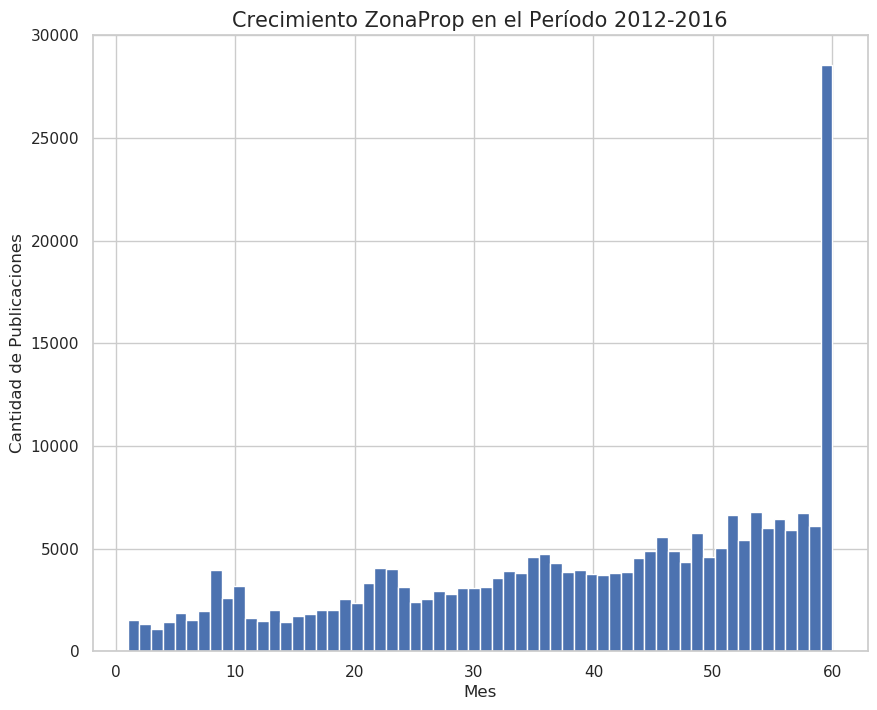

In [227]:
periods.hist(bins=60)
plt.title("Crecimiento ZonaProp en el Período 2012-2016", fontsize = 15)
plt.xlabel("Mes", fontsize = 12)
plt.ylabel("Cantidad de Publicaciones", fontsize = 12)

## Analisis Distribucion Publicaciones Mes a Mes en cada Año

In [20]:
df_reduced = df_props_full.loc[:,{'year','month'}]
df_reduced.head(2)

,year,month
0,2012,1
1,2012,1


In [27]:
df_reduced = df_reduced.groupby(['year','month']).agg('size').to_frame()


0
year month       
2012 1       1528
     2       1327
     3       1103
     4       1434
     5       1857
     6       1524
     7       1973
     8       3971
     9       2598
     10      3161
     11      1608
     12      1450
2013 1       1993
     2       1401
     3       1734
     4       1829
     5       2000
     6       2016
     7       2524
     8       2374
     9       3321
     10      4056
     11      4012
     12      3126
2014 1       2403
     2       2534
     3       2916
     4       2780
     5       3071
     6       3082
     7       3125
     8       3583
     9       3911
     10      3811
     11      4613
     12      4743
2015 1       4310
     2       3869
     3       3957
     4       3783
     5       3696
     6       3804
     7       3875
     8       4526
     9       4863
     10      5552
     11      4906
     12      4329
2016 1       5775
     2       4592
     3       5022
     4       6640
     5       5438
     6       6795
     7       6013
     8       6443
     9       5929
     10      6726
     11      6086
     12     28579

In [67]:
df_reduced = df_reduced.reset_index()

In [81]:
pubs_by_month_and_year = pd.pivot_table(df_reduced, index = ['month'], columns = ['year'])
pubs_by_month_and_year

0                         
year   2012  2013  2014  2015   2016
month                               
1      1528  1993  2403  4310   5775
2      1327  1401  2534  3869   4592
3      1103  1734  2916  3957   5022
4      1434  1829  2780  3783   6640
5      1857  2000  3071  3696   5438
6      1524  2016  3082  3804   6795
7      1973  2524  3125  3875   6013
8      3971  2374  3583  4526   6443
9      2598  3321  3911  4863   5929
10     3161  4056  3811  5552   6726
11     1608  4012  4613  4906   6086
12     1450  3126  4743  4329  28579

In [93]:
pubs_by_month_and_year.columns = pubs_by_month_and_year.columns.droplevel()

In [94]:
pubs_by_month_and_year

year,2012,2013,2014,2015,2016
month,,,,,
1,1528,1993,2403,4310,5775
2,1327,1401,2534,3869,4592
3,1103,1734,2916,3957,5022
4,1434,1829,2780,3783,6640
5,1857,2000,3071,3696,5438
6,1524,2016,3082,3804,6795
7,1973,2524,3125,3875,6013
8,3971,2374,3583,4526,6443
9,2598,3321,3911,4863,5929


Text(0, 0.5, 'Cantidad de Publicaciones')

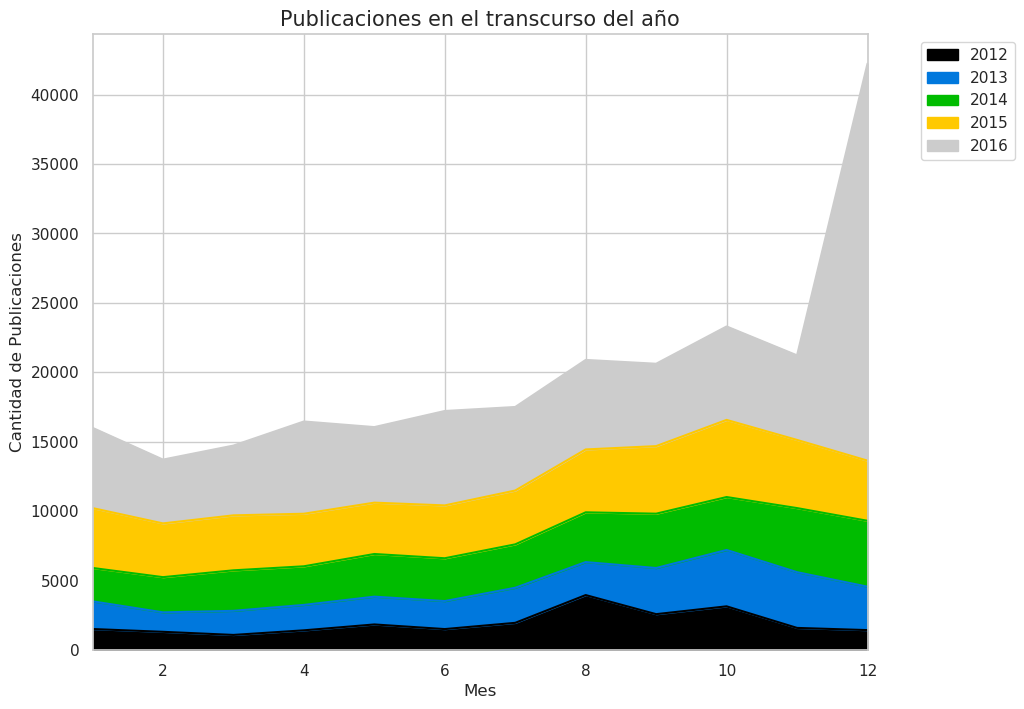

In [138]:
pubs_by_month_and_year.plot(kind='area',colormap = 'nipy_spectral',legend=True)
plt.legend(bbox_to_anchor = (1.2, 1))
plt.title("Publicaciones en el transcurso del año", fontsize = 15)
# plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12])
plt.xlabel("Mes", fontsize = 12)
plt.ylabel("Cantidad de Publicaciones", fontsize = 12)